# 1. Импорт данных.

In [118]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

In [119]:
data = pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


# 2. Определяем тип задачи

Регрессия, тк значение варьируется от 0 до 1

In [120]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: >

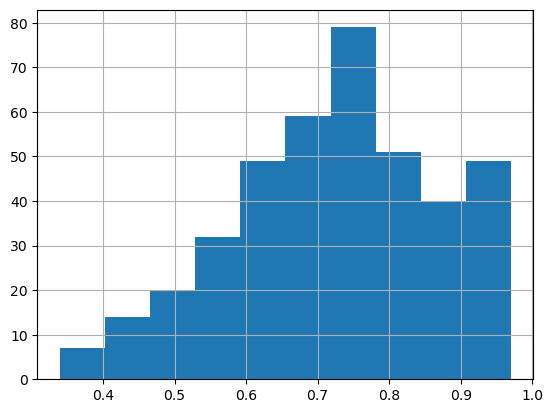

In [121]:

data[target_variable].hist()

In [122]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [123]:
data[target_variable].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

# 3. Предобработка данных

In [124]:
from sklearn.preprocessing import StandardScaler # Нормирование

y = data[target_variable]
X = data.drop(columns=[target_variable], axis=1)
X = X.drop('Serial No.', axis=1)

X_ans = StandardScaler().fit_transform(X)
X_ans

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ans, y, test_size=0.2, random_state=33)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


Обучить на тренировочном множестве:
Линейную модель (LogisticRegression, LinearRegression)
Деревянную модель (DecisionTreeClassifier, DecisionTreeRegressor) (тут советую попробовать разные глубины деревьев)
K-ближайших соседей (KNeighborsClassifier, KNeighborsRegressor) (тут тоже есть смысл попробовать разные k)
Случайный лес (RandomForestClassifier, RandomForestRegressor)


In [127]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

Линейная модель

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_model = model.predict(X_test)

mae_model = mean_squared_error(y_test, y_pred_model)
rmse_model = root_mean_squared_error(y_test, y_pred_model)

Линейная регрессия — это один из самых простых и популярных методов в машинном обучении для задач регрессии, где цель — предсказать числовое значение. Модель основывается на предположении, что существует линейная зависимость между входными признаками и целевой переменной.

Во время обучения модель находит оптимальные значения коэффициентов, минимизируя ошибку (например, через метод наименьших квадратов).


Деревянная модель

In [129]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mae_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)

строит дерево, где каждый узел представляет собой проверку одного из признаков, а ветви — это результат этой проверки. разделении данных по признакам с максимальным уменьшением неопределенности (например, с использованием критерия уменьшения энтропии для классификации или MSE для регрессии).

K-ближайшие соседи

In [130]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

mae_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)

1) сначала вычисляется расстояние между тестовым и всеми обучающими образцами;

2) далее из них выбирается k-ближайших образцов (соседей), где число k задаётся заранее;

3) итоговым прогнозом среди выбранных k-ближайших образцов будет мода в случае классификации и среднее арифметическое в случае регрессии;

4) предыдущие шаги повторяются для всех тестовых образцов.

Случайный лес

In [131]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

Каждое дерево в случайном лесе обучается на случайной выборке данных, и используется случайный набор признаков для каждого раздела, что снижает корреляцию между деревьями.

# 5. Подсчет метрик

In [ ]:
def Metrik(y_pred, y_true=y_test):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

metrik_model = Metrik(y_pred_model)
metrik_tree = Metrik(y_pred_tree)
metrik_knn = Metrik(y_pred_knn)
metrik_rf = Metrik(y_pred_rf)

metrics = pd.DataFrame({
    'Model': ['Линейная', 'Деревянная', 'K', 'Случ Лес'],
    'MAE': [mae_model, mae_tree, mae_knn, mae_rf], #Средняя абсолютная ошибка 
    'RMSE': [rmse_model, rmse_tree, rmse_knn, rmse_rf], #Корень из среднеквадратичной ошибки
    'MAPE': [metrik_model, metrik_tree, metrik_knn, mape_rf] #Средняя абсолютная ошибка
})



In [133]:
metrics

,Model,MAE,RMSE,MAPE
0,Линейная,0.004505,0.067120,7.511657
1,Деревянная,0.005792,0.076102,8.388049
2,K,0.004552,0.067472,7.878422
3,Случ Лес,0.005075,0.071239,8.369899


Какая модель справилась лучше с поставленной задачей?
- Линейная модель показала наименьшие значения MAE, RMSE и MAPE

Имеет ли место переобучение?
- Переобучение происходит, когда модель слишком хорошо обучается на тренировочной выборке, но плохо обобщает на тестовой
В данном случае все модели показывают схожие результаты => отсутствие значительного переобучения

Имеет ли место недообучение?
- все модели имеют достаточно низкие значения MAE, RMSE и MAPE, что указывает на хорошую обучаемость => нет явных признаков недообучения

Как можно улучшить метрики моделей?
- Настройка гиперпараметров, использование других методов регуляризации или более сложная модель